In [4]:
import pandas as pd

/usr/local/lib/python3.12/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
# Load the dataset
file_path = "/home/ichigo/Desktop/asthma_disease_data.csv"
df = pd.read_csv(file_path)

In [6]:
# Display basic information 
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

(None,
    PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
 0       5034   63       0          1               0  15.848744        0   
 1       5035   26       1          2               2  22.757042        0   
 2       5036   57       0          2               1  18.395396        0   
 3       5037   40       1          2               1  38.515278        0   
 4       5038   61       0          0               3  19.283802        0   
 
    PhysicalActivity  DietQuality  SleepQuality  ...  LungFunctionFEV1  \
 0          0.894448     5.488696      8.701003  ...          1.369051   
 1          5.897329     6.341014      5.153966  ...          2.197767   
 2          6.739367     9.196237      6.840647  ...          1.698011   
 3          1.404503     5.826532      4.253036  ...          3.032037   
 4          4.604493     3.127048      9.625799  ...          3.470589   
 
    LungFunctionFVC  Wheezing  ShortnessOfBreath  ChestTightness  Coughing  \
 0   

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

/tmp/ipykernel_46850/2089189137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Diagnosis"], palette="viridis")


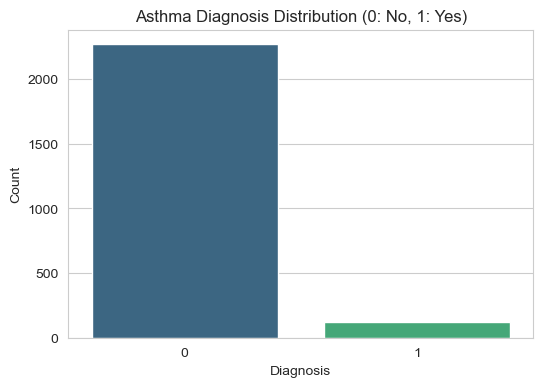

In [8]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Diagnosis"], palette="viridis")
plt.title("Asthma Diagnosis Distribution (0: No, 1: Yes)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()


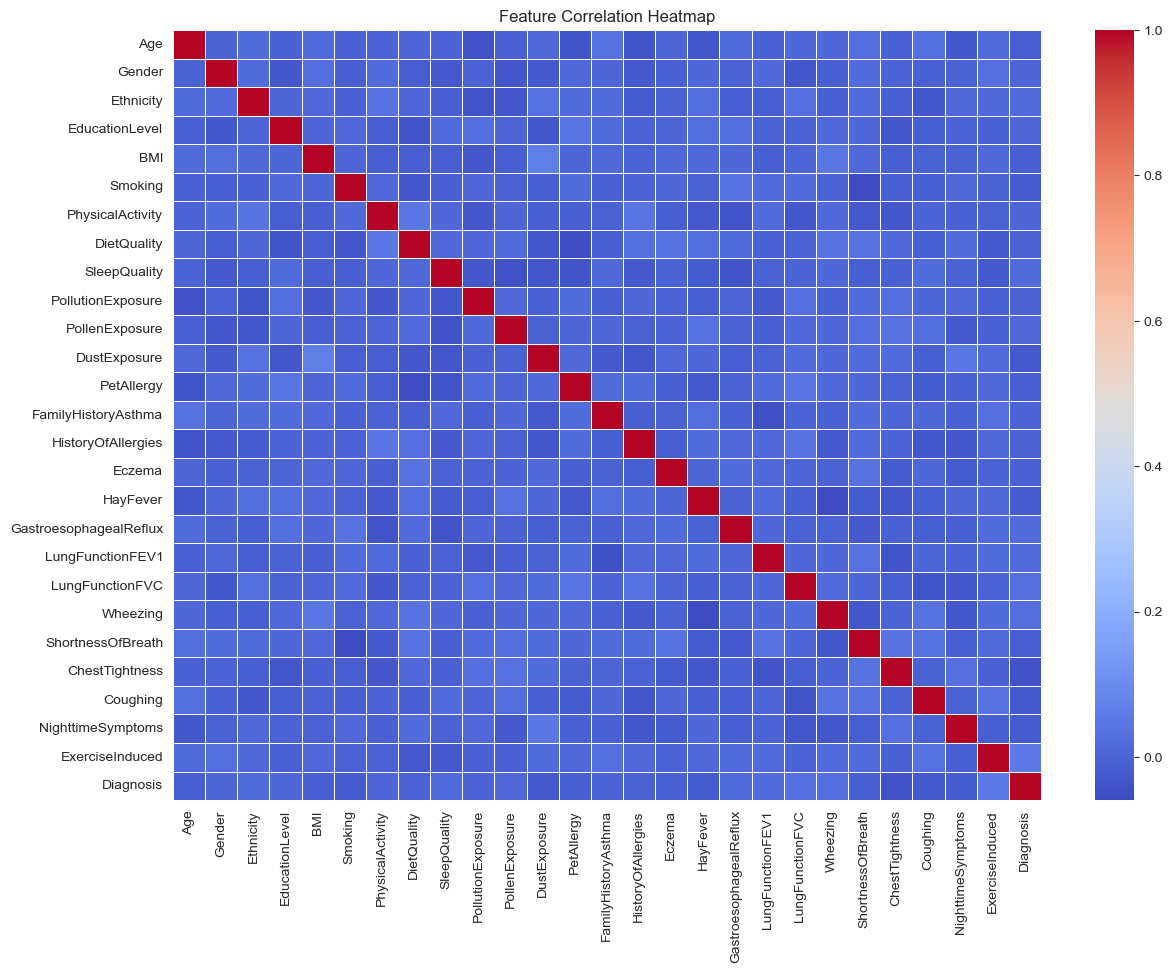

In [9]:
# Plot correlation heatmap
plt.figure(figsize=(14, 10))
corr_matrix = df.drop(columns=["PatientID", "DoctorInCharge"]).corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


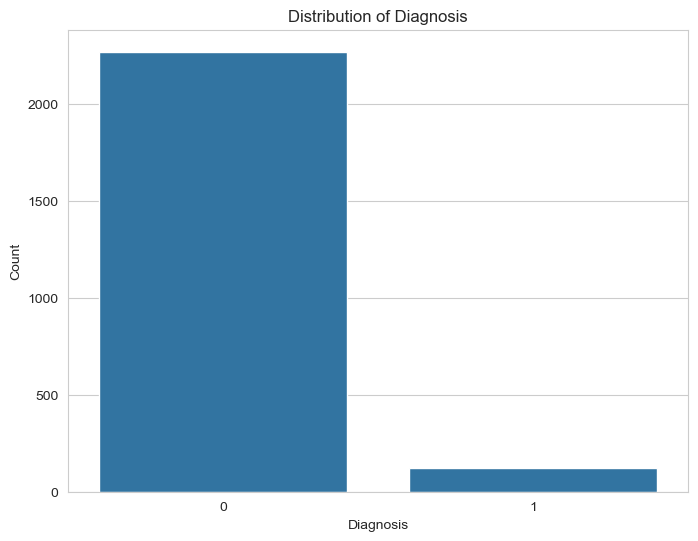

In [10]:
# 2. Check Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=df)  
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [12]:
# 3. Correlation Analysis
# Separate numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


NameError: name 'np' is not defined

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Drop unnecessary columns
df_clean = df.drop(columns=["PatientID", "DoctorInCharge"])

In [14]:

# Separate features and target
X = df_clean.drop(columns=["Diagnosis"])
y = df_clean["Diagnosis"]

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a RandomForest to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances

DietQuality               0.090040
LungFunctionFVC           0.084839
SleepQuality              0.082572
PollutionExposure         0.081111
PhysicalActivity          0.079565
DustExposure              0.079401
PollenExposure            0.079368
Age                       0.078245
LungFunctionFEV1          0.077671
BMI                       0.076744
EducationLevel            0.028216
Ethnicity                 0.023996
HistoryOfAllergies        0.012052
NighttimeSymptoms         0.011560
Gender                    0.011104
ChestTightness            0.011097
GastroesophagealReflux    0.011080
Wheezing                  0.010356
Coughing                  0.010302
ExerciseInduced           0.009927
FamilyHistoryAsthma       0.009906
ShortnessOfBreath         0.009170
HayFever                  0.008386
PetAllergy                0.008302
Smoking                   0.008286
Eczema                    0.006701
dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel="rbf", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}


In [ ]:
# Train and evaluate models
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

In [ ]:
# model accuracies
accuracy_scores
best_model = None
best_accuracy = 0

In [ ]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

    # Save the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

In [ ]:
# Save the best model
best_model_filename = f"best_model_{best_model_name.replace(' ', '_')}.pkl"
with open(best_model_filename, "wb") as f:
    pickle.dump(best_model, f)

In [ ]:
# Save the scaler
scaler_filename = "scaler.pkl"
with open(scaler_filename, "wb") as f:
    pickle.dump(scaler, f)


In [ ]:
# Print results
print("Model Accuracies:", accuracy_scores)
print(f"Best Model: {best_model_name} with Accuracy: {best_accuracy:.2f}")
print(f"Best Model Saved as: {best_model_filename}")
print(f"Scaler Saved as: {scaler_filename}")

Model Accuracies: {'Random Forest': 0.9478079331941545, 'Logistic Regression': 0.9478079331941545, 'SVM': 0.9478079331941545, 'Gradient Boosting': 0.941544885177453}
Best Model: Random Forest with Accuracy: 0.95
Best Model Saved as: best_model_Random_Forest.pkl
Scaler Saved as: scaler.pkl


In [16]:
df_clean.columns


Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
       'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='object')